In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
from sklearn.model_selection import KFold, cross_val_score

In [57]:
df = pd.read_csv('train.csv')

In [58]:
pd.options.display.max_rows = 85

In [59]:
pd.options.display.max_columns = 85

In [60]:
df.shape

(2051, 81)

In [61]:
df[df['Mas Vnr Area'].isna()] #Masonry Veneer is a strong indicator of housing quality, so it's in our interest to drop these rows or rename them to None/0 to run them


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
22,2393,528142010,60,RL,103.0,12867,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1209.0,1209.0,GasA,Ex,Y,SBrkr,1209,1044,0,2253,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2005.0,Fin,2.0,575.0,TA,TA,Y,243,142,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,344133
41,2383,528110050,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,465000
86,539,531371050,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,184900
212,518,528458020,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NaN,NaN,NaN,0,10,2009,New,225000
276,2824,908130020,20,RL,75.0,8050,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,TA,TA,PConc,Gd,TA,Av,GLQ,475.0,ALQ,297.0,142.0,914.0,GasA,Ex,Y,SBrkr,914,0,0,914,1.0,0.0,1,0,2,1,Gd,4,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,32,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,117250
338,1800,528458150,60,FV,112.0,12217,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip,CompShg,WdShing,Wd Shng,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,GLQ,745.0,Unf,0.0,210.0,955.0,GasA,Ex,Y,SBrkr,955,925,0,1880,1.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2007.0,Fin,3.0,880.0,TA,TA,Y,168,127,0,0,0,0,NaN,NaN,NaN,0,12,2007,New,310013
431,1455,907251090,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,0,211,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,237000
451,1120,528439010,20,RL,87.0,10037,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,247000
591,1841,533208040,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2.0,569.0

In [62]:
df.dropna(subset=['Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area', 'BsmtFin SF 1', 'Mas Vnr Area', 'Mas Vnr Type'], inplace = True)
#these have small sets of values with null values that can easily be afforded to be dropped for cleaner data 


In [63]:
df.dropna(subset=['Mas Vnr Type', 'Mas Vnr Area'], inplace = True)

In [11]:
df[df['Garage Type'].isna()] # These are very likely 0 values because there is no Garage

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
28,2243,911103060,190,C (all),75.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,2fmCon,2Story,5,6,1895,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,957.0,957.0,GasA,Fa,N,SBrkr,1034,957,0,1991,0.0,0.0,2,0,4,2,TA,9,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,133,0,0,0,NaN,NaN,NaN,0,6,2007,WD,119600
53,330,923226250,160,RM,21.0,1476,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,176.0,Unf,0.0,370.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,200,26,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,76000
65,2278,923202134,20,RL,70.0,8402,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,206.0,Unf,0.0,914.0,1120.0,GasA,Ex,Y,SBrkr,1120,0,0,1120,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,30,0,0,0,0,NaN,NaN,NaN,0,12,2007,New,147000
79,2235,910201050,50,RM,50.0,7288,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1925,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,BrkTil,TA,Po,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,665,0,1601,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,176,0,0,NaN,NaN,NaN,0,9,2007,WD,129850
101,2084,905476170,30,RL,58.0,9098,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,ALQ,348.0,Unf,0.0,180.0,528.0,GasA,Ex,Y,SBrkr,605,0,0,605,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,144,0,0,0,NaN,NaN,NaN,0,7,2007,WD,86000
103,728,902477130,30,C (all),72.0,9392,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,3,1900,1950,Mansard,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,CBlock,Fa,TA,No,Unf,0.0,Unf,0.0,245.0,245.0,GasA,TA,N,SBrkr,797,0,0,797,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,36,94,0,0,0,NaN,NaN,NaN,0,9,2009,WD,44000
114,781,905228050,20,RL,NaN,9000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,2,2,1947,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,SBrkr,660,0,0,660,0.0,0.0,1,0,2,1,Fa,5,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,100,0,0,0,NaN,NaN,NaN,0,6,2009,WD,63900
120,1492,908127120,30,RL,63.0,13907,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1940,1969,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,290.0,Unf,0.0,706.0,996.0,GasA,Ex,Y,SBrkr,996,0,0,996,1.0,0.0,1,0,3,1,TA,6,Typ,1,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,144,0,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,108000
134,1514,909100170,30,RL,67.0,5604,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1925,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,Unf,0.0,396.0,864.0,GasA,TA,N,FuseA,864,0,0,864,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,96,0,0,0,NaN,NaN,NaN,0,4,2008,WD,98000
136,216,905

In [12]:
df[df['Lot Frontage'].isna()]  #These are missing values - most of the Lot Area values seem listed.  Could remove these whole values

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1952.0,Unf,1.0,420.0,TA,TA,Y,0,324,0,0,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
23,12,527165230,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,185000
27,1534,909277040,50,RL,NaN,11700,Pave,Grvl,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1937,1995,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,606.0,Unf,0.0,336.0,942.0,GasA,Ex,Y,SBrkr,1265,673,0,1938,0.0,0.0,2,0,4,1,Gd,7,Min2,1,Gd,Detchd,1937.0,Unf,1.0,240.0,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,198000
31,2860,909276010,70,RL,NaN,11435,Pave,NaN,IR1,HLS,AllPub,Corner,Mod,Crawfor,Norm,Norm,1Fam,2Story,8,7,1929,1950,Gable,CompShg,BrkFace,Stucco,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,792.0,792.0,GasA,Fa,Y,SBrkr,792,725,0,1517,0.0,0.0,1,0,3,1,Gd,7,Typ,2,Gd,Detchd,1931.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,230000
42,983,923275040,85,RL,NaN,9101,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,6,1978,1978,Gable,CompShg,Plywood,Plywood,BrkFace,104.0,TA,Gd,PConc,Gd,TA,Av,GLQ,1097.0,Unf,0.0,0.0,1097.0,GasA,Ex,Y,SBrkr,1110,0,0,1110,1.0,0.0,1,0,1,1,Gd,4,Typ,1,TA,Attchd,1978.0,Fin,2.0,602.0,TA,TA,Y,303,30,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,165500
50,2511,533221080,160,FV,NaN,2998,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,2000,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,513.0,Gd,TA,PConc,Gd,TA,No,GLQ,353.0,Unf,0.0,403.0,756.0,GasA,Ex,Y,SBrkr,768,756,0,1524,0.0,0.0,2,1,2,1,Gd,4,Typ,0,NaN,Detchd,2000.0,Unf,2.0,440.0,TA,TA,Y,0,32,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,166000
59,997,527107010,60,RL,NaN,15038,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1996,1996,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Rec,138.0,Unf,0.0,778.0,916.0,GasA,Gd,Y,SBrkr,916,720,0,1636,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1996.0,Fin,2.

In [13]:
#df[df['Garage Type'].map(replace('NaN', 'Na'))

In [14]:
df.dropna(axis = 1, thresh = 500, inplace = True)

In [15]:
df.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       324
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         0
Mas Vnr Area         0
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           53
Bsmt Cond           53
Bsmt Exposure       56
BsmtFin Type 1      53
BsmtFin SF 1         0
BsmtFin Type 2      54
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical           0
1st Flr SF 

In [16]:
df.drop(columns=['Fireplace Qu'], inplace = True) #998 missing values is pretty big and could mean this column  is biased)

<h1>FEATURE ENGINEERING</h1>

In [17]:
df['Garage_Interaction'] = df['Garage Area']*df['Garage Cars']
df['Total_Bldg_SF'] = df['Total Bsmt SF'] + df['1st Flr SF'] + df['2nd Flr SF'] + df['Open Porch SF'] + df['Wood Deck SF'] +df['Mas Vnr Area'] 



In [18]:

df = pd.get_dummies(df, columns=['Central Air'])

In [19]:
df = pd.get_dummies(df, columns=['Paved Drive'])

In [20]:
df = pd.get_dummies(df, columns = ['Heating QC']) 

In [21]:
#df = pd.get_dummies(df, columns = ['Utilities

In [22]:
#df.dropna(subset=['name', 'born'], inplace = True)

In [23]:
holdout = pd.read_csv('test.csv') # YOU MUST DO SEPARATE CLEANUP ON THE HOLDOUT 

In [24]:
holdout.dropna(subset=['Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area', 'BsmtFin SF 1', 'Mas Vnr Area', 'Mas Vnr Type', 'Wood Deck SF'], inplace = True)
holdout.dropna(axis = 1, thresh = 500, inplace = True)

In [25]:
holdout['Garage_Interaction'] = holdout['Garage Area']*holdout['Garage Cars']

holdout['Total_Bldg_SF'] = holdout['Total Bsmt SF'] + holdout['1st Flr SF'] + holdout['2nd Flr SF'] 
+ holdout['Open Porch SF'] + df['Wood Deck SF']


0        60.0
1         0.0
2        24.0
3       100.0
4        76.0
5         0.0
6         0.0
7         0.0
8       111.0
9       418.0
10       64.0
11      237.0
12       30.0
13      169.0
14       36.0
15        0.0
16        0.0
17        0.0
18      236.0
19      338.0
20       90.0
21      524.0
22        NaN
23      613.0
24      442.0
25        0.0
26      416.0
27        0.0
28        0.0
29       21.0
30      474.0
31       23.0
32        0.0
33        0.0
34      322.0
35       33.0
36      104.0
37        0.0
38        0.0
39      430.0
40      970.0
41        NaN
        ...  
2009      NaN
2010      NaN
2011      NaN
2012      NaN
2013      NaN
2014      NaN
2015      NaN
2016      NaN
2017      NaN
2018      NaN
2019      NaN
2020      NaN
2021      NaN
2022      NaN
2023      NaN
2024      NaN
2025      NaN
2026      NaN
2027      NaN
2028      NaN
2029      NaN
2030      NaN
2031      NaN
2032      NaN
2033      NaN
2034      NaN
2035      NaN
2036      NaN
2037  

In [26]:

#holdout.dropna(subset=['Total_Bldg_SF'], inplace = True) what is causing Na errors?? realized i can't submit this abbridged. 

In [27]:
holdout['Garage_Interaction'].isnull().sum()

0

In [28]:
holdout = pd.get_dummies(holdout, columns=['Central Air'])

In [29]:
holdout = pd.get_dummies(holdout, columns =['Paved Drive'])

In [30]:
holdout = pd.get_dummies(holdout, columns = ['Heating QC']) 

In [31]:
holdout.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Garage_Interaction,Total_Bldg_SF,Central Air_N,Central Air_Y,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_TA
0,2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0.0,Unf,0.0,1020.0,1020.0,GasA,FuseP,908,1020,0,1928,0.0,0.0,2,0,4,2,Fa,9,Typ,0,Detchd,1910.0,Unf,1.0,440.0,Po,Po,0,60,112,0,0,0,0,4,2006,WD,440.0,2948.0,1,0,0,0,1,0,0,1,0
1,2718,905108090,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1967.0,1967.0,GasA,SBrkr,1967,0,0,1967,0.0,0.0,2,0,6,2,TA,10,Typ,0,Attchd,1977.0,Fin,2.0,580.0,TA,TA,170,0,0,0,0,0,0,8,2006,WD,1160.0,3934.0,0,1,0,0,1,0,0,0,1
2,2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554.0,Unf,0.0,100.0,654.0,GasA,SBrkr,664,832,0,1496,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,2006.0,RFn,2.0,426.0,TA,TA,100,24,0,0,0,0,0,9,2006,New,852.0,2150.0,0,1,0,0,1,1,0,0,0
3,1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,968.0,968.0,GasA,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,TA,5,Typ,0,Detchd,1935.0,Unf,2.0,480.0,Fa,TA,0,0,184,0,0,0,0,7,2007,WD,960.0,1936.0,0,1,1,0,0,0,0,0,1
4,625,535105100,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609.0,Unf,0.0,785.0,1394.0,GasA,SBrkr,1394,0,0,1394,1.0,0.0,1,1,3,1,TA,6,Typ,2,Attchd,1963.0,RFn,2.0,514.0,TA,TA,0,76,0,0,185,0,0,7,2009,WD,1028.0,2788.0,0,1,0,0,1,0,0,1,0


In [32]:
holdout.isnull().sum()

Id                      0
PID                     0
MS SubClass             0
MS Zoning               0
Lot Frontage          160
Lot Area                0
Street                  0
Lot Shape               0
Land Contour            0
Utilities               0
Lot Config              0
Land Slope              0
Neighborhood            0
Condition 1             0
Condition 2             0
Bldg Type               0
House Style             0
Overall Qual            0
Overall Cond            0
Year Built              0
Year Remod/Add          0
Roof Style              0
Roof Matl               0
Exterior 1st            0
Exterior 2nd            0
Mas Vnr Type            0
Mas Vnr Area            0
Exter Qual              0
Exter Cond              0
Foundation              0
Bsmt Qual              25
Bsmt Cond              25
Bsmt Exposure          25
BsmtFin Type 1         25
BsmtFin SF 1            0
BsmtFin Type 2         25
BsmtFin SF 2            0
Bsmt Unf SF             0
Total Bsmt S

In [33]:
df['Garage_Interaction'] = df['Garage Area']*df['Garage Cars']

In [34]:
df.drop(columns=['Garage Area', 'Garage Cars', 'Central Air_N', 'Paved Drive_P', 'Heating QC_Po'], inplace = True) 


In [35]:

df['Total_Bldg_SF'] = df['Total Bsmt SF'] + df['1st Flr SF'] + df['2nd Flr SF'] + df['Open Porch SF'] + df['Wood Deck SF'] +df['Mas Vnr Area'] 


In [36]:
X = df[['Overall Qual', 'Garage_Interaction', 'Total_Bldg_SF', 'Year Built', 'Year Remod/Add', 
        'Full Bath', 'TotRms AbvGrd', 'Fireplaces', 'PID', 'Enclosed Porch', 'Half Bath', 'Central Air_Y', 
        'Paved Drive_Y', 'Paved Drive_N', 'Heating QC_Ex', 'Heating QC_Fa', 'Heating QC_Gd', 'Heating QC_TA']]



In [37]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Qual,Garage Cond,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage_Interaction,Total_Bldg_SF,Central Air_Y,Paved Drive_N,Paved Drive_Y,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_TA
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,1976.0,RFn,TA,TA,0,44,0,0,0,0,0,3,2010,WD,130500,950.0,2537.0,1,0,1,1,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,1997.0,RFn,TA,TA,0,74,0,0,0,0,0,4,2009,WD,220000,1118.0,3241.0,1,0,1,1,0,0,0
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,1953.0,Unf,TA,TA,0,52,0,0,0,0,0,1,2010,WD,109000,246.0,2166.0,1,0,1,0,0,0,1
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,2007.0,Fin,TA,TA,100,0,0,0,0,0,0,4,2010,WD,174000,800.0,1928.0,1,0,1,0,0,1,0
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,1957.0,Unf,TA,TA,0,59,0,0,0,0,0,3,2010,WD,138500,968.0,2180.0,1,1,0,0,0,0,1


In [38]:
#X = df[['Overall Qual', 'Gr Liv Area', 'Garage_Interaction', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Fireplaces', 'PID', 'Enclosed Porch', 'Open Porch SF', 
#       'Wood Deck SF', 'Half Bath', '2nd Flr SF', 'Mas Vnr Area']] Before swapping SF variables for Total_Bldg_SF


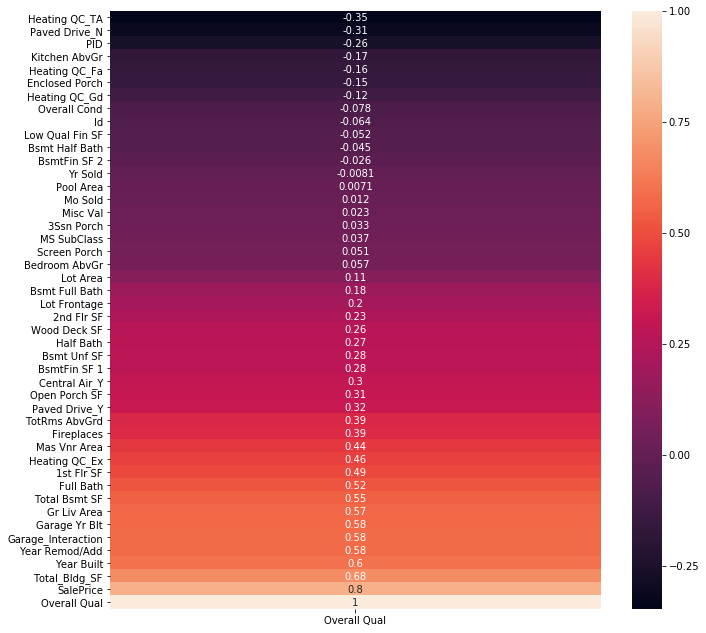

In [39]:
plt.subplots(figsize = (11, 11))
sns.heatmap(df.corr()[['Overall Qual']].sort_values('Overall Qual'), annot=True)

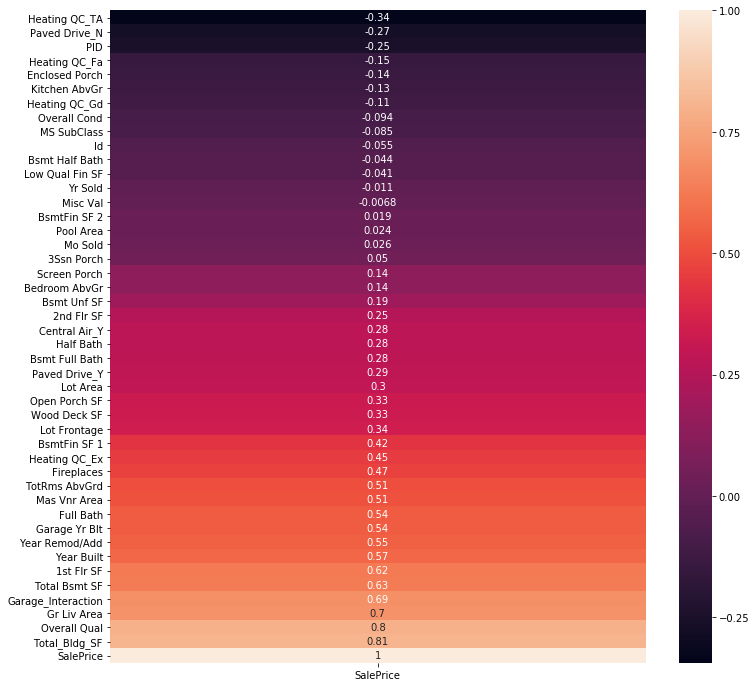

In [40]:
plt.subplots(figsize = (12, 12))
sns.heatmap(df.corr()[['SalePrice']].sort_values('SalePrice'), annot= True)

In [41]:
X.isna().sum()

Overall Qual          0
Garage_Interaction    0
Total_Bldg_SF         0
Year Built            0
Year Remod/Add        0
Full Bath             0
TotRms AbvGrd         0
Fireplaces            0
PID                   0
Enclosed Porch        0
Half Bath             0
Central Air_Y         0
Paved Drive_Y         0
Paved Drive_N         0
Heating QC_Ex         0
Heating QC_Fa         0
Heating QC_Gd         0
Heating QC_TA         0
dtype: int64

In [42]:
#X = df.loc[:, ['Gr Liv Area', 'Year Built', 'Full Bath']]
y = df['SalePrice']

In [43]:
X.shape

(2026, 18)

In [44]:
X

,Overall Qual,Garage_Interaction,Total_Bldg_SF,Year Built,Year Remod/Add,Full Bath,TotRms AbvGrd,Fireplaces,PID,Enclosed Porch,Half Bath,Central Air_Y,Paved Drive_Y,Paved Drive_N,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_TA
0,6,950.0,2537.0,1976,2005,2,6,0,533352170,0,1,1,1,0,1,0,0,0
1,7,1118.0,3241.0,1996,1997,2,8,1,531379050,0,1,1,1,0,1,0,0,0
2,5,246.0,2166.0,1953,2007,1,5,0,535304180,0,0,1,1,0,0,0,0,1
3,5,800.0,1928.0,2006,2007,2,7,0,916386060,0,1,1,1,0,0,0,1,0
4,6,968.0,2180.0,1900,1993,2,6,0,906425045,0,0,1,0,1,0,0,0,1
5,6,1156.0,3405.0,1966,2002,2,6,1,535126040,0,1,1,1,0,1,0,0,0
6,6,1050.0,1745.0,2005,2006,2,5,0,908186070,0,0,1,1,0,0,0,1,0
7,5,1062.0,2556.0,1959,1959,1,6,0,535154050,0,0,1,1,0,0,1,0,0
8,5,420.0,2172.0,1952,1952,1,6,0,535353130,0,0,1,1,0,0,0,0,1
9,5,1008.0,3647.0,1969,1969,1,9,2,535426130,0,2,1,1,0,0,0,0,1


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
ss = StandardScaler()
ss.fit(X_train) 
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)  #Is this ok??  Do I need the unscaled training data after this?

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [47]:
holdout_scaled = ss.transform(holdout[['Overall Qual', 'Garage_Interaction', 'Total_Bldg_SF', 'Year Built', 'Year Remod/Add', 
        'Full Bath', 'TotRms AbvGrd', 'Fireplaces', 'PID', 'Enclosed Porch', 'Half Bath', 'Central Air_Y', 
        'Paved Drive_Y', 'Paved Drive_N', 'Heating QC_Ex', 'Heating QC_Fa', 'Heating QC_Gd', 'Heating QC_TA']])
                                      

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
df.corr()[['SalePrice']].sort_values('SalePrice')

,SalePrice
Heating QC_TA,-0.343350
Paved Drive_N,-0.273230
PID,-0.252480
Heating QC_Fa,-0.149130
Enclosed Porch,-0.138048
Kitchen AbvGr,-0.126232
Heating QC_Gd,-0.113301
Overall Cond,-0.094233
MS SubClass,-0.085339
Id,-0.055072


In [49]:
#plt.scatter(X['Overall Qual'], y)

In [50]:
#plt.subplots(figsize = (40, 40))
#sns.heatmap(df.corr(), annot = True)

In [51]:
#plt.subplots(20, 20)
#sns.heatmap(X.corr(), annot = True)


In [52]:
print('X training data shape is', X_train.shape)
print('X testing data shape is', X_test.shape)
print('y training data shape is', y_train.shape)
print('y testing data shape is', y_test.shape)
print('holdout scaled shape is', holdout_scaled.shape)

X training data shape is (1519, 18)
X testing data shape is (507, 18)
y training data shape is (1519,)
y testing data shape is (507,)
holdout scaled shape is (878, 18)


In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)
cv_scores = cross_val_score(lr, X_train, y_train, cv=8)
preds = lr.predict(holdout_scaled)

In [ ]:
preds[:10]

In [ ]:
sub = holdout[['Id']]

In [ ]:
sub['SalePrice'] = preds

In [ ]:
sub.shape

In [ ]:
print('cv score', cross_val_score(lr, X_train, y_train, cv=10).mean())
print('train score', lr.score(X_train, y_train))
print('test score', lr.score(X_test,y_test))

In [ ]:
#Removing Gr living area at this point hardly changes my model 

In [ ]:
print('cv score', cross_val_score(lr, X_train, y_train, cv=10).mean())
print('train score', lr.score(X_train, y_train))
print('test score', lr.score(X_test,y_test))

In [ ]:
#print('cv score', cross_val_score(lr, X_train, y_train, cv=10).mean())
#print('train score', lr.score(X_train, y_train))
#print('test score', lr.score(X_test,y_test))

In [ ]:
sub.to_csv('kaggle_sub_8maybe.csv', index=False)